# Abalone dataset
<p align='center'>
<img width=650 src="https://github.com/DanOliveira-DS/Datasets_for_Practicing_Applied_Machine_Learning/blob/master/imgs/abalone.jpg?raw=true">
</p>

A idade do abalone é determinada cortando a casca através do cone, manchando-a e contando o número de anéis através de um microscópio uma tarefa chata e demorada. Outras medidas, mais fáceis de obter, são utilizadas para prever a idade. Nosso objetivo é desenvolver um modelo de *machine learning* capaz de prever a idade do abalone através dessas medidas

# Importar Bibliotecas

In [1]:
# para analise de dados
import numpy as np
import pandas as pd 

# visualização
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.colors
from matplotlib import rcParams
labelsize = 14
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 
import seaborn as sns
sns.set_style('white')
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, RepeatedKFold , train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, QuantileTransformer, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Carregar conjunto de dados


In [2]:
# adicionando colunas
names = ['sex','length','diameter','height','wholeWeight','shuckedWeight','visceraWeight','shellWeight','rings']

# load dataset
abaloneDf = pd.read_csv('https://raw.githubusercontent.com/DanOliveira-DS/Datasets_for_Practicing_Applied_Machine_Learning/master/csv%20files/abalone.csv', header=None, names=names)

In [3]:
abaloneDf.head()

,sex,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Dicionario das variáveis: 

* **Sex** - (M: Male, F: Female, I: Infant)


* **Length** - Longest Shell measurement (millimeters - mm)


* **Diameter** - Diameter - perpendicular to length (mm)


* **Height** - Height - with meat in shell (mm)


* **Whole weight** - Weight of whole abalone (grams)


* **Shucked weight** - Weight of meat (grams)


* **Viscera weight** - Gut weight after bleeding (grams)


* **Shell weight** - Shell weight - after being dried (grams)


* **Rings** - Rings - value + 1.5 gives age in years (eg. 4 = 5.5 years)



# Análise Exploratória de Dados
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto que utilize variáveis em sua pesquisa. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações e padrões, lançar hipóteses e melhor entender resultados de modelos ou análises subsequentes mais complexas

O objetivo principal da AED é maximizar a percepção do analista sobre um conjunto de dados e sobre a estrutura subjacente de um conjunto de dados. Fornecendo todos os itens específicos que um analista deseja extrair de um conjunto de dados, como:

* Obter uma visão geral da distribuição do conjunto de dados;
* Verificar se há valores numéricos ausentes, *outliers* ou outras anomalias no conjunto de dados;
* Descobrir padrões e relacionamentos entre variáveis no conjunto de dados.

## Começando pelo básico


### Qual o tamanho do conjunto de dados? (Quantas observações e features)
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.

Em relação à dimensionalidade dos dados, nosso dataset é composto por 4177 observações(entradas) e 9 features(colunas/variáveis).

In [4]:
# tamanho do conjunto de dados
print("DIMENSÃO DO CONJUNTO DE DADOS")
print(f"> Observações: {abaloneDf.shape[0]}")
print(f"> Features: {abaloneDf.shape[1]}")

DIMENSÃO DO CONJUNTO DE DADOS
> Observações: 4177
> Features: 9


### Quais são os tipos de dados das minhas features? (Numéricos, categóricos)
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [5]:
# dtype
abaloneDf.dtypes

sex               object
length           float64
diameter         float64
height           float64
wholeWeight      float64
shuckedWeight    float64
visceraWeight    float64
shellWeight      float64
rings              int64
dtype: object

Nosso conjunto de dados é composto majoritariamente por variáveis numéricas. A única variável categórica que possuímos e  `sex` que indica o sexo da nossa abalone. Por se tratar de uma variável categórica iremos tratá-la pelo simples fato de que o modelos de *machine learning* não gostam de trabalhar com variáveis categóricas.

### Valores Ausentes

Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises.

In [6]:
abaloneDf.isnull().sum()

sex              0
length           0
diameter         0
height           0
wholeWeight      0
shuckedWeight    0
visceraWeight    0
shellWeight      0
rings            0
dtype: int64

### Resumo estatístico
O método `.describe()` nos ajuda a visualizar as propriedades estatísticas de variáveis numéricas. Exclui variáveis de caracteres.

Imediatamente você obtém um resumo contendo algumas das principais informações estatísticas relevantes:

* **count** - quantidade de entradas válidas
* **mean** - média dos valores
* **std** - desvio padrão
* **min** - menor valor da coluna
* **25%** - (Q1) primeiro quartil 25
* **50%** - mediana
* **75%** - (Q3) terceiro quartil 75
* **max** - maior valor da coluna

Ainda é possível identificar colunas com possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)

In [7]:
# resumo estatistico
abaloneDf.describe()

,length,diameter,height,wholeWeight,shuckedWeight,visceraWeight,shellWeight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


Nosso resumo estatístico apresentou:
* valores discrepantes (*outliers*) nas variáveis `['height','wholeWeight','shuckedWeight','shellWeight','rings']`.

Verificar a presença de *outliers* é importante porque os valores discrepantes distorcem nossa distribuição o que pode influenciar negativamente na performance dos algoritmos de *machine learning* já que eles geralmente assumem uma distribuição uni variada gaussiana nas variáveis de entrada.

Aqui temos algumas alternativas. Podemos investigar mais ao fundo e ver o quanto esses valores então afetando nosso conjunto de dados e dependendo do caso removê-los o que implicaria em uma perda de informação ou aplicar um padronizador/escalonador mais robusto como (*RobustScaler()* ou ate mesmo *QuantileScaler()*). Como aplicaremos algumas transformações ao nosso conjunto de dados e ver como elas se saem não investigarei mais a fundo esses valores.

## Visualização dos dados

### Histogramas
Uma maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Os histogramas agrupam dados em posições e fornecem uma contagem do número de observações em cada posição. A partir da forma das caixas, você pode ter uma ideia rápida de se um atributo é gaussiano, inclinado(skewed) ou mesmo tem uma distribuição exponencial. Também pode ajudar a ver possíveis discrepâncias.

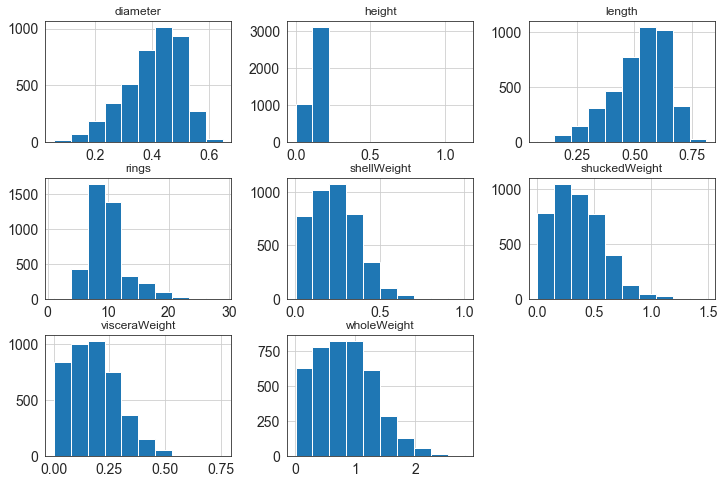

In [8]:
# hist
abaloneDf.hist(figsize=(12, 8));

Podemos ver muitas distribuições diferentes, algumas com distribuições semelhantes às gaussianas, outras com distribuições aparentemente exponenciais ou discretas. Também podemos ver que todas elas parecem ter uma escala muito diferente.

### Distribuição da variável alvo [`rings`] 
Vamos apresentar um gráfico apresentando quais valores de anéis apresentam mais observações relacionados a ele.

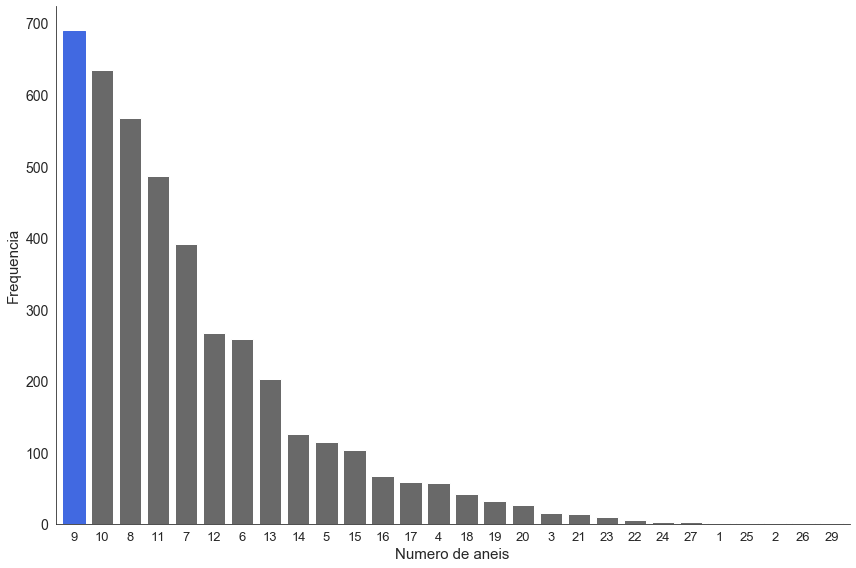

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
abaloneDf['rings'].value_counts().plot(kind='bar', width=0.8, ax=ax, color='dimgrey')
ax.set_xlabel("Numero de aneis", fontsize=15)
ax.set_ylabel("Frequencia", fontsize=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.patches[0].set_color('royalblue')



plt.tight_layout()

Podemos notar que grande parte das nossas observações estão concentradas entre 8 e 11 anéis sendo 9 o que possui maior quantidade

### Estudo das correlações
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela.
* O coeficiente de correlação varia de-1 a + 1;
    * Quando estiver próximo de +1, isso significa que há uma forte correlação positiva;
    * Quando estiver próximo-1, significa que há uma forte correlação negativa.
    
Para identificar as correlações existentes entre as variáveis de interesse vou:
* Criar uma matriz de correlação;
* Analisar a correlação das nossas variáveis em relação a nossa variável alvo target
* Para uma visualização mais macro vamos plotar um heatmap(mapa de calor)


In [10]:
# instanciando matriz correlaçao
corr = abaloneDf.corr()

In [11]:
# Analisar a correlação das nossas variaveis em relação a nossa variavel alvo target
corr['rings'].sort_values(ascending=False)

rings            1.000000
shellWeight      0.627574
diameter         0.574660
height           0.557467
length           0.556720
wholeWeight      0.540390
visceraWeight    0.503819
shuckedWeight    0.420884
Name: rings, dtype: float64

#### Mapa de Calor 
Um mapa de calor é uma representação gráfica em que valores individuais de uma matriz são representados como cores. Um mapa de calor é muito útil para visualizar a concentração de valores entre duas dimensões de uma matriz. Isso ajuda a encontrar padrões e fornece uma perspectiva de profundidade.

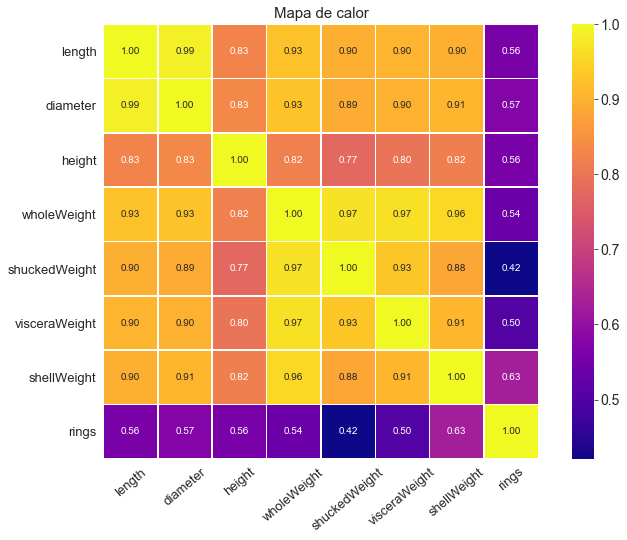

In [12]:
plt.figure(figsize=(12,8))
plt.title('Mapa de calor', fontsize=15)
a = sns.heatmap(corr, cmap='plasma', square=True, annot=True, fmt='.2f', linewidths=0.5, linecolor='white')
a.set_xticklabels(a.get_xticklabels(), fontsize=13, rotation=40)
a.set_yticklabels(a.get_yticklabels(), fontsize=13, rotation=0)           
plt.show()

# Dividir o conjunto de dados
Antes de prosseguirmos para criação do modelo precisamos dividir nossos dados em treino e teste. Isso porque se avaliarmos nosso modelo com os mesmos dados que usaremos para o treinar, nosso modelo pode estar muito bem ajustado! Um modelo deve ser julgado pela sua capacidade de prever em dados novos e nunca vistos.

In [15]:
# criar um copia dos dados originais
abaSetCopy = abaloneDf.copy()

# criar variaveis dummies
dummies = abaSetCopy[['sex', 'length', 'diameter', 'height', 'wholeWeight',
                      'shuckedWeight', 'visceraWeight', 'shellWeight', 'rings']]

# gerando os dummie
abaSetCopy = pd.get_dummies(dummies)

# ordenando as colunas
abaSetCopy = abaSetCopy[['sex_M', 'sex_F', 'sex_I', 'length', 'diameter',
                         'height', 'wholeWeight', 'shuckedWeight', 'visceraWeight',
                         'shellWeight', 'rings']]

In [16]:
# separando os dados em entrada (X) e saida (y)
X = abaSetCopy.loc[:, :'shellWeight']
y = abaSetCopy.loc[:, 'rings']

In [17]:
# separando os dados em treino e teste
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

# Criar um modelo para ser nosso Baseline 
O `DummyRegressor` nos permite criar um modelo muito simples que podemos usar como referência para comparar com outros modelos.

In [18]:
# instanciando modelo para baseline e aplicando a estrategia de media
naive = DummyRegressor(strategy='mean')


In [19]:
# função para avaliar o modelo
def aval_model(X, y, model, metric='neg_mean_absolute_error'):
    """
    Função que recebe os dados de entrada(input), saída(output) e o modelo que será avaliado
    atraves 10-Kfold Cross-Validation
    X = dados de entrada
    y = dados de saída
    model = modelo de machine learning ou pipeline com transformações
    metric = nossa metrica de avaliação, por padrao MAE 
    """
    # 10 Kfold Cross-validation
    kf = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # avaliando o modelo com cross_val_score()
    scores = cross_val_score(model, X, y, scoring=metric, cv=kf, n_jobs=-1, error_score='raise')
    # tornando resultado positivo
    scores = abs(scores)
    
    return scores

## Avaliando modelo de referência
Em problemas de regressão queremos minimizar nosso erro. Quanto mais próximo de zero melhor em relação a métricas como erro absoluto médio (MAE) e erro de raiz quadrada média (RMSE). Já para a métrica R-quadrado (*r2*) os valores estão sempre entre 0 e 100%: 
* 0% indica que o modelo não explica nada da variabilidade dos dados de resposta ao redor de sua média.
* 100% indica que o modelo explica toda a variabilidade dos dados de resposta ao redor de sua média.

In [20]:
# MAE BASELINE
baselineScore = aval_model(X_train, y_train, model=naive, metric='neg_mean_absolute_error')
print(f"{baselineScore}\n")
print(f"> Baseline MAE: {round(baselineScore.mean(), 4)} ({round(baselineScore.std(), 4)})")
print("-"*50+"\n")

# RMSE BASELINE
baselineScore = aval_model(X_train, y_train, model=naive, metric='neg_mean_squared_error')
baselineScore = np.sqrt(baselineScore)
print(f"{baselineScore}\n")
print(f"> Baseline RMSE: {round(baselineScore.mean(), 4)} ({round(baselineScore.std(), 4)})")
print("-"*50+"\n")

# r2 BASELINE
baselineScore = aval_model(X_train, y_train, model=naive, metric='r2')
print(f"{baselineScore}\n")
print(f"> Baseline r2: {round(baselineScore.mean(), 4)} ({round(baselineScore.std(), 4)})")

[2.41971087 2.30978471 2.61102402 2.5572156  2.49391866 2.18352702
 2.338497   2.27136929 2.38846368 2.2631259  2.29492986 2.14226112
 2.36409115 2.40410959 2.5349729  2.38210249 2.38638363 2.54796473
 2.44225332 2.33602256 2.14856279 2.27489326 2.27537212 2.3567267
 2.3788913  2.69275967 2.37453336 2.38475787 2.72121517 2.23149435]

> Baseline MAE: 2.3837 (0.142)
--------------------------------------------------

[3.36882058 3.1238715  3.69380097 3.59669872 3.36174412 2.81536673
 2.97495286 3.0292276  3.36412466 3.02964339 3.07261299 2.79123915
 3.20511428 3.31551456 3.44966888 3.29273825 3.41212087 3.48670052
 3.36729157 3.00832892 2.85702287 3.12853069 3.07492409 3.17649942
 3.32194382 3.55240419 3.24986115 3.28823045 3.65517236 3.08977212]

> Baseline RMSE: 3.2385 (0.2358)
--------------------------------------------------

[4.73359070e-03 1.02716756e-02 6.28508120e-03 3.98807773e-04
 6.47595253e-03 1.66023995e-03 1.11548665e-02 1.24257524e-04
 1.76611240e-03 2.68437895e-05 2.4879

Agora que sabemos como nosso modelo de referência se comportou. Próximo passo é definir os algoritmos que utilizaremos para ver aqueles que se saem melhor que nosso modelo de referência

# Definir os modelos
Vamos criar um dicionario que vai conter nossos modelos um mix de modelos lineare, não lineares e ensembles. Vamos fornecer algumas variações do modelo com diferentes configurações que apresentam bom desempenho em média. Nosso objetivo não é otimizar nosso modelo como um tuning dos parâmetros(faremos isso mais tarde) e sim dar aos modelo a chance de ter um bom desempenho no problema. Isso nos ajuda a focar nos algoritmos que realmente podem gerar bons resultados e nao ficamos presos 

In [21]:
def definir_modelos(models=dict()):
    """
    Função que retorna um dicionario com os modelos definidos

    """
    # MODELOS LINEARES
    models['lr'] = LinearRegression()
    # alpha para modelos regularizados
    alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    # Lasso
    for a in alpha:
        models['lasso-'+str(a)] = Lasso(alpha=a)
    # Ridge
    for a in alpha:
        models['ridge-'+str(a)] = Ridge(alpha=a)
    # Elastic Net
    for a1 in alpha:
        for a2 in alpha:
            models['en-'+str(a1)+'-'+str(a2)] = ElasticNet(a1, a2)

    # MODELOS NÃO LINEARES
    # Arvore de Decisão
    models['cart'] = DecisionTreeRegressor()
    # SVM- Linear
    models['svml'] = SVR(kernel='linear')
    # SVM - poly
    models['svmp'] = SVR(kernel='poly')
    valor_c = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for c in valor_c:
        models['svmr-' + str(c)] = SVR(C=c)
    # KNN
    n_vizinhos = range(1, 21)
    for k in n_vizinhos:
        models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)

    # MODELOS ENSEMBLE
    # Random Foreste
    models['rf'] = RandomForestRegressor(n_estimators=100)
    models['gb'] = GradientBoostingRegressor(n_estimators=100)
    models['xgb'] = XGBRegressor(n_estimators=100)
    models['lgb'] = LGBMRegressor(n_estimators=100)

    print(f"Foram definidos {len(models)} modelos:")

    return models

# Funcão para apresentar os resultados
Para deixar nosso resultado mais organizado vou criar uma função que vai imprimir os 10 melhores resultados e plotar um gráfico no estilo box plot para cada um 

In [22]:
# função para apresentar os melhores resultados
def show_results(resultados, maximize=False, top_n=10):
    """
    Seleciona os melhores modelos e os apresenta em forma de ranking do melhor para o pior. Plotando de forma gráfica os 
    box plots.
    resultados = dict contendo nome do modelo atrelado ao seu score
    maximize = por padrao False. Ja que em problemas de regressão quanto mais proximo de zero melhor. No caso da metrica
    r2, mudar para True
    top_n = Indica quantos modelo apresentar. Por padrão 10
    """
    
    # criando a tupla(nome, resultado)
    meanScores = [(k, v.mean()) for k,v in resultados.items()]
    # ordenando do menor para o maior (RMSE menor melhor que maior)
    meanScores = sorted(meanScores, key=lambda x: x[1])
    if maximize:
        meanScores = list(reversed(meanScores))
    # vamos agora selecionar os 10 melhores
    nomes = [x[0] for x in meanScores[:10]]
    scores = [resultados[x[0]] for x in meanScores[:10]]
    # vamos agora exibir os 10 melhores 
    for i in range(10):
        nome = nomes[i]
        meanScore, stdScore = resultados[nome].mean(), resultados[nome].std()
        print(f"Pos:{i+1}, Nome:{nome}, Pontuação:{round(meanScore, 4)} ({round(stdScore, 4)})")
    
    # vamos plotar os resultados
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot(scores, showmeans=True)
    ax.set_title('Best Models', fontsize=17)
    ax.set_xticklabels(labels=nomes, rotation=18)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    
    

# Avaliando os modelos

Nossa avaliação vai ser atraves do 10-Kfold Cross Validation onde vale lembrar que nossa métrica de avaliação (**RMSE**) quanto mais próxima de zero melhor. Vamos avaliar os modelos para cada configuração que vamos definir nos pipelines. Nosso intuito é ver como nossos modelos reagem a essas transformações. No final vamos plotar nossos resultados.

In [25]:
%%time
# chaar nossa função com os modelos
models = definir_modelos()
# vamos cirar um dicionario que vai conter nossos resultados
resultados = dict()
print("Utlizando a metrica RMSE")
for name, model in models.items():
    scores = aval_model(X_train, y_train, model, metric='neg_mean_squared_error')
    scores = np.sqrt(scores)
    resultados[name] = scores
    score_mean, std_mean = scores.mean(), scores.std()
    print(f"{name} - {round(score_mean, 4)} ({round(std_mean, 5)})")

Foram definidos 181 modelos:
Utlizando a metrica RMSE
lr - 2.2292 (0.16623)
lasso-0.0 - 2.228 (0.16646)
lasso-0.1 - 2.6721 (0.18946)
lasso-0.2 - 2.7026 (0.1994)
lasso-0.3 - 2.7532 (0.20852)
lasso-0.4 - 2.8219 (0.21639)
lasso-0.5 - 2.8878 (0.22392)
lasso-0.6 - 2.9643 (0.23111)
lasso-0.7 - 3.0523 (0.23777)
lasso-0.8 - 3.151 (0.24395)
lasso-0.9 - 3.2381 (0.2365)
lasso-1.0 - 3.2385 (0.23581)
ridge-0.0 - 2.229 (0.16564)
ridge-0.1 - 2.2204 (0.15185)
ridge-0.2 - 2.2158 (0.14367)
ridge-0.3 - 2.213 (0.13895)
ridge-0.4 - 2.2113 (0.13617)
ridge-0.5 - 2.2104 (0.13453)
ridge-0.6 - 2.21 (0.13359)
ridge-0.7 - 2.2099 (0.13309)
ridge-0.8 - 2.2102 (0.13288)
ridge-0.9 - 2.2107 (0.13286)
ridge-1.0 - 2.2113 (0.13296)
en-0.0-0.0 - 2.228 (0.16646)
en-0.0-0.1 - 2.228 (0.16646)
en-0.0-0.2 - 2.228 (0.16646)
en-0.0-0.3 - 2.228 (0.16646)
en-0.0-0.4 - 2.228 (0.16646)
en-0.0-0.5 - 2.228 (0.16646)
en-0.0-0.6 - 2.228 (0.16646)
en-0.0-0.7 - 2.228 (0.16646)
en-0.0-0.8 - 2.228 (0.16646)
en-0.0-0.9 - 2.228 (0.16646)
en-0

Ranking com os melhores resultados (RMSE):
Pos:1, Nome:gb, Pontuação:2.1736 (0.1409)
Pos:2, Nome:rf, Pontuação:2.2008 (0.15)
Pos:3, Nome:knn-14, Pontuação:2.2067 (0.1616)
Pos:4, Nome:knn-13, Pontuação:2.2079 (0.1671)
Pos:5, Nome:knn-12, Pontuação:2.2088 (0.1669)
Pos:6, Nome:ridge-0.7, Pontuação:2.2099 (0.1331)
Pos:7, Nome:knn-15, Pontuação:2.21 (0.1636)
Pos:8, Nome:ridge-0.6, Pontuação:2.21 (0.1336)
Pos:9, Nome:ridge-0.8, Pontuação:2.2102 (0.1329)
Pos:10, Nome:ridge-0.5, Pontuação:2.2104 (0.1345)


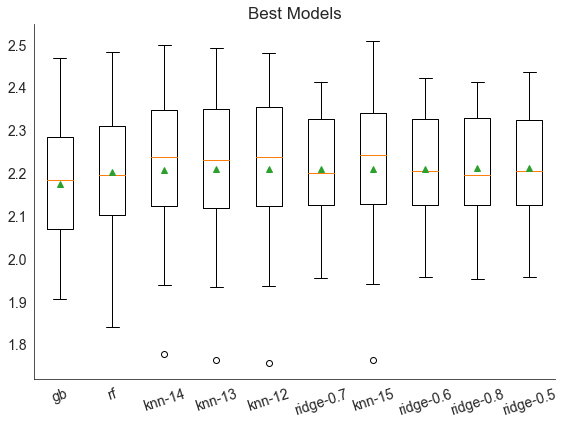

In [26]:
print("Ranking com os melhores resultados (RMSE):")
show_results(resultados)

# Definindo pipelines de transformações
Alguns algoritmos de aprendizado de máquina têm um desempenho muito melhor se todas as variáveis forem dimensionadas para o mesmo intervalo, como dimensionar todas as variáveis para valores entre 0 e 1, denominado normalização(`MinMaxScaler()`). Isso afeta algoritmos que usam uma soma ponderada da entrada, como modelos lineares e redes neurais, bem como modelos que usam medidas de distância, como máquinas de vetores de suporte(`SVM()`) e vizinhos k-mais próximos(`KNN()`).

Como tal, é uma boa prática dimensionar dados de entrada e talvez até tentar outras transformações de dados, como tornar os dados mais normais (se ajustam melhor a uma distribuição de probabilidade gaussiana) usando uma transformação de potência(`PowerTransformer()`).

Isso também se aplica a variáveis de saída, chamadas de variáveis de destino, como valores numéricos previstos ao modelar problemas de modelagem preditiva de regressão. Isso pode ser alcançado em Python usando a classe `TransformedTargetRegressor()`.

Para problemas de regressão, geralmente é desejável escalar ou transformar as variáveis de entrada e de destino.

In [29]:
def pipeNone(model):
    """
    Função que retorna estimador(modelo) final sem qualquer transformação.
    """
    return model

def pipeStd(model):
    """
    Função que retorna um pipeline que padroniza as variáveis numéricas usando a função StandardScaler() 
    que serão aplicadas ao estimador(modelo) final
    """
    steps = list()
    steps.append(('std', StandardScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeMinMax(model):
    """
    Função que retorna um pipeline que normaliza as variáveis numéricas usando a função MinMaxScaler()
    que serão aplicadas ao estimador(modelo) final
    
    """
    steps = list()
    steps.append(('norm', MinMaxScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipePower(model):
    """
    Função que retorna um pipeline que padroniza as variáveis numéricas usando a função PowerTransformer()
    que serão aplicadas ao estimador(modelo) final
    
    """
    steps = list()
    steps.append(('power', PowerTransformer()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeStdMinMax(model):
    """
    Função que retorna um pipeline que padroniza(StandardScaler) e depois normaliza(MinMaxScaler) as variáveis numéricas
    alimentando um modelo final.
    """
    steps = list()
    steps.append(('std', StandardScaler()))
    steps.append(('norm', MinMaxScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeQuant(model):
    """
    Função que retorna um pipeline que transforma as numéricas usando QuantileTransformer() que vai alimentar um modelo final.
    """
    steps = list()
    steps.append(('q', QuantileTransformer()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline

def pipeRobu(model):
    """
    Função que retorna um pipeline que transforma as numéricas usando RobustScaler() que vai alimentar um modelo final.
    """
    steps = list()
    steps.append(('r', RobustScaler()))
    steps.append(('m', model))
    pipeline = Pipeline(steps=steps)
    return pipeline
    
pipelines = [pipeNone, pipeStd, pipeMinMax, pipePower, pipeStdMinMax, pipeQuant, pipeRobu]   

Com os transformadores definidos vamos avaliar nossos modelos para cada um deles.

In [30]:
%%time
# chaar nossa função com os modelos
models = definir_modelos()
# vamos cirar um dicionario que vai conter nossos resultados
resultados = dict()

for name, model in models.items():
    for i in range(len(pipelines)):
        scores = aval_model(X_train, y_train, model=pipelines[i](model), metric='neg_mean_squared_error')
        scores = np.sqrt(scores)
        resultados[str(i)+"."+name] = scores
        score_mean, std_mean = scores.mean(), scores.std()
        print(f"{str(i)}{name}: {round(score_mean, 4)} ({round(std_mean, 4)})")

Foram definidos 181 modelos:
0lr: 2.2292 (0.1662)
1lr: 2.2285 (0.1664)
2lr: 2.2291 (0.1664)
3lr: 2.3003 (0.4591)
4lr: 2.2291 (0.1664)
5lr: 2.2452 (0.1397)
6lr: 2.229 (0.1666)
0lasso-0.0: 2.228 (0.1665)
1lasso-0.0: 2.228 (0.1665)
2lasso-0.0: 2.228 (0.1665)
3lasso-0.0: 2.2994 (0.4573)
4lasso-0.0: 2.228 (0.1665)
5lasso-0.0: 2.2439 (0.1403)
6lasso-0.0: 2.228 (0.1665)
0lasso-0.1: 2.6721 (0.1895)
1lasso-0.1: 2.312 (0.1871)
2lasso-0.1: 2.5931 (0.2005)
3lasso-0.1: 2.3517 (0.3198)
4lasso-0.1: 2.5931 (0.2005)
5lasso-0.1: 2.5247 (0.1854)
6lasso-0.1: 2.3654 (0.1992)
0lasso-0.2: 2.7026 (0.1994)
1lasso-0.2: 2.447 (0.1823)
2lasso-0.2: 2.8577 (0.2263)
3lasso-0.2: 2.4543 (0.1878)
4lasso-0.2: 2.8577 (0.2263)
5lasso-0.2: 2.5937 (0.2025)
6lasso-0.2: 2.5258 (0.19)
0lasso-0.3: 2.7532 (0.2085)
1lasso-0.3: 2.5104 (0.1808)
2lasso-0.3: 2.9904 (0.231)
3lasso-0.3: 2.486 (0.1805)
4lasso-0.3: 2.9904 (0.231)
5lasso-0.3: 2.7062 (0.2178)
6lasso-0.3: 2.5446 (0.194)
0lasso-0.4: 2.8219 (0.2164)
1lasso-0.4: 2.5283 (0.184)

1en-0.1-0.8: 2.3179 (0.1898)
2en-0.1-0.8: 2.6587 (0.2027)
3en-0.1-0.8: 2.4153 (0.4538)
4en-0.1-0.8: 2.6587 (0.2027)
5en-0.1-0.8: 2.5496 (0.1929)
6en-0.1-0.8: 2.3776 (0.1995)
0en-0.1-0.9: 2.6736 (0.1909)
1en-0.1-0.9: 2.3149 (0.1885)
2en-0.1-0.9: 2.6446 (0.202)
3en-0.1-0.9: 2.3864 (0.3927)
4en-0.1-0.9: 2.6446 (0.202)
5en-0.1-0.9: 2.5372 (0.1906)
6en-0.1-0.9: 2.3719 (0.1994)
0en-0.1-1.0: 2.6721 (0.1895)
1en-0.1-1.0: 2.312 (0.1871)
2en-0.1-1.0: 2.5931 (0.2005)
3en-0.1-1.0: 2.3517 (0.3198)
4en-0.1-1.0: 2.5931 (0.2005)
5en-0.1-1.0: 2.5247 (0.1854)
6en-0.1-1.0: 2.3654 (0.1992)
0en-0.2-0.0: 2.7066 (0.2049)
1en-0.2-0.0: 2.3966 (0.1858)
2en-0.2-0.0: 2.7574 (0.214)
3en-0.2-0.0: 2.5393 (0.4907)
4en-0.2-0.0: 2.7574 (0.214)
5en-0.2-0.0: 2.6422 (0.2009)
6en-0.2-0.0: 2.468 (0.1886)
0en-0.2-0.1: 2.7092 (0.2053)
1en-0.2-0.1: 2.3995 (0.1868)
2en-0.2-0.1: 2.7634 (0.2149)
3en-0.2-0.1: 2.5404 (0.4922)
4en-0.2-0.1: 2.7634 (0.2149)
5en-0.2-0.1: 2.6436 (0.2019)
6en-0.2-0.1: 2.4721 (0.1897)
0en-0.2-0.2: 2.7119 

1en-0.5-0.5: 2.5385 (0.1913)
2en-0.5-0.5: 3.063 (0.2353)
3en-0.5-0.5: 2.6002 (0.3446)
4en-0.5-0.5: 3.063 (0.2353)
5en-0.5-0.5: 2.856 (0.227)
6en-0.5-0.5: 2.5942 (0.1992)
0en-0.5-0.6: 2.885 (0.2244)
1en-0.5-0.6: 2.5409 (0.1924)
2en-0.5-0.6: 3.0877 (0.2347)
3en-0.5-0.6: 2.5989 (0.3506)
4en-0.5-0.6: 3.0877 (0.2347)
5en-0.5-0.6: 2.8896 (0.2297)
6en-0.5-0.6: 2.5994 (0.2008)
0en-0.5-0.7: 2.8881 (0.2247)
1en-0.5-0.7: 2.5435 (0.1932)
2en-0.5-0.7: 3.0909 (0.2351)
3en-0.5-0.7: 2.5894 (0.3212)
4en-0.5-0.7: 3.0909 (0.2351)
5en-0.5-0.7: 2.9294 (0.2326)
6en-0.5-0.7: 2.6033 (0.2025)
0en-0.5-0.8: 2.8921 (0.225)
1en-0.5-0.8: 2.5478 (0.1938)
2en-0.5-0.8: 3.0951 (0.2356)
3en-0.5-0.8: 2.5746 (0.2789)
4en-0.5-0.8: 3.0951 (0.2356)
5en-0.5-0.8: 2.9704 (0.2351)
6en-0.5-0.8: 2.6064 (0.2041)
0en-0.5-0.9: 2.898 (0.225)
1en-0.5-0.9: 2.5493 (0.1917)
2en-0.5-0.9: 3.101 (0.2363)
3en-0.5-0.9: 2.5504 (0.2234)
4en-0.5-0.9: 3.101 (0.2363)
5en-0.5-0.9: 3.0081 (0.2379)
6en-0.5-0.9: 2.6105 (0.2066)
0en-0.5-1.0: 2.8878 (0.2

1en-0.9-0.2: 2.5738 (0.1929)
2en-0.9-0.2: 3.0838 (0.234)
3en-0.9-0.2: 2.6155 (0.2562)
4en-0.9-0.2: 3.0838 (0.234)
5en-0.9-0.2: 2.9206 (0.2288)
6en-0.9-0.2: 2.6339 (0.2018)
0en-0.9-0.3: 3.011 (0.2308)
1en-0.9-0.3: 2.5811 (0.1951)
2en-0.9-0.3: 3.1391 (0.2362)
3en-0.9-0.3: 2.6228 (0.2601)
4en-0.9-0.3: 3.1391 (0.2362)
5en-0.9-0.3: 2.9776 (0.2319)
6en-0.9-0.3: 2.6521 (0.2043)
0en-0.9-0.4: 3.0301 (0.2318)
1en-0.9-0.4: 2.5913 (0.1973)
2en-0.9-0.4: 3.1639 (0.2359)
3en-0.9-0.4: 2.6321 (0.2654)
4en-0.9-0.4: 3.1639 (0.2359)
5en-0.9-0.4: 3.0421 (0.2352)
6en-0.9-0.4: 2.6713 (0.2066)
0en-0.9-0.5: 3.0533 (0.2332)
1en-0.9-0.5: 2.6032 (0.1997)
2en-0.9-0.5: 3.1789 (0.2365)
3en-0.9-0.5: 2.643 (0.2725)
4en-0.9-0.5: 3.1789 (0.2365)
5en-0.9-0.5: 3.119 (0.2383)
6en-0.9-0.5: 2.6893 (0.2092)
0en-0.9-0.6: 3.0831 (0.2349)
1en-0.9-0.6: 2.617 (0.2018)
2en-0.9-0.6: 3.1992 (0.2372)
3en-0.9-0.6: 2.6544 (0.2752)
4en-0.9-0.6: 3.1992 (0.2372)
5en-0.9-0.6: 3.1866 (0.2388)
6en-0.9-0.6: 2.7096 (0.212)
0en-0.9-0.7: 3.1122 (

0knn-12: 2.2088 (0.1669)
1knn-12: 2.2529 (0.1693)
2knn-12: 2.2262 (0.1607)
3knn-12: 2.2612 (0.174)
4knn-12: 2.2262 (0.1607)
5knn-12: 2.2662 (0.1807)
6knn-12: 2.2538 (0.1687)
0knn-13: 2.2079 (0.1671)
1knn-13: 2.2512 (0.1708)
2knn-13: 2.2263 (0.1637)
3knn-13: 2.2618 (0.1729)
4knn-13: 2.2263 (0.1637)
5knn-13: 2.2678 (0.1777)
6knn-13: 2.251 (0.1713)
0knn-14: 2.2067 (0.1616)
1knn-14: 2.2525 (0.1711)
2knn-14: 2.2296 (0.1636)
3knn-14: 2.2613 (0.1744)
4knn-14: 2.2296 (0.1636)
5knn-14: 2.2649 (0.1761)
6knn-14: 2.2484 (0.1692)
0knn-15: 2.21 (0.1636)
1knn-15: 2.2548 (0.1718)
2knn-15: 2.2301 (0.1661)
3knn-15: 2.2638 (0.1796)
4knn-15: 2.2301 (0.1661)
5knn-15: 2.2644 (0.1783)
6knn-15: 2.2505 (0.1703)
0knn-16: 2.2125 (0.1644)
1knn-16: 2.2502 (0.1736)
2knn-16: 2.2326 (0.166)
3knn-16: 2.2647 (0.1783)
4knn-16: 2.2326 (0.166)
5knn-16: 2.2655 (0.1802)
6knn-16: 2.2528 (0.1723)
0knn-17: 2.2124 (0.1645)
1knn-17: 2.2509 (0.1718)
2knn-17: 2.2333 (0.1644)
3knn-17: 2.2652 (0.1809)
4knn-17: 2.2333 (0.1644)
5knn-1

Pos:1, Nome:0.gb, Pontuação:2.1738 (0.1406)
Pos:2, Nome:5.gb, Pontuação:2.1742 (0.1423)
Pos:3, Nome:6.gb, Pontuação:2.1743 (0.1408)
Pos:4, Nome:1.gb, Pontuação:2.1759 (0.141)
Pos:5, Nome:4.gb, Pontuação:2.1761 (0.1418)
Pos:6, Nome:2.gb, Pontuação:2.1761 (0.1405)
Pos:7, Nome:3.gb, Pontuação:2.1767 (0.1405)
Pos:8, Nome:5.svmp, Pontuação:2.1869 (0.1624)
Pos:9, Nome:6.svmr-1.0, Pontuação:2.1871 (0.1698)
Pos:10, Nome:6.svmr-0.9, Pontuação:2.1928 (0.1716)
Wall time: 141 ms


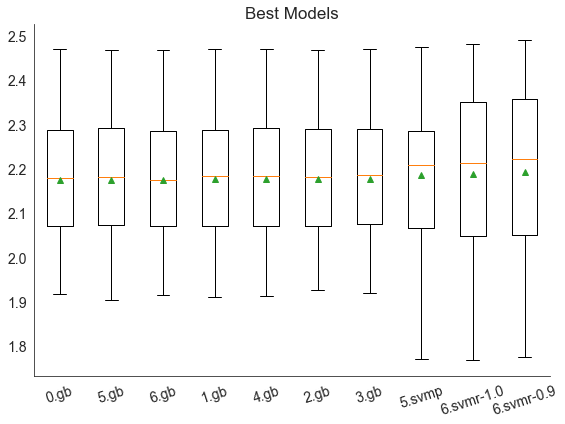

In [31]:
%%time
show_results(resultados)

Como esperado os modelos ensemble aqueles baseado em arvores tiveram um aproveitamento muito melhor em relacão aos outros.

# Realizando o Tuning dos parametros
Os algoritmos de aprendizagem da máquina têm hiperparâmetros que lhe permitem adaptar o comportamento do algoritmo ao seu conjunto de dados específico. Os hiperparâmetros são diferentes dos parâmetros, que são os coeficientes ou pesos internos de um modelo encontrado pelo algoritmo de aprendizagem.

Para realizar nosso *tunning* vamos utilizar *RandomizedSearchCV()*. Vale ressaltar que quanto mais hiperparâmetros, mais lento é o processo de *tuning*. Uma das vantagens de utilizar *RandomizedSearchCV* é que você pode passar a quantidade de interações que você quer que aconteça o que pode reduzir o tempo de *tuning*, diferente do *GridSearch()* que vai ira fazer todas as combinações possíveis.

In [32]:
# Instanciando o modelo
modelGB = GradientBoostingRegressor()

# definindo parametros
loss = ['ls', 'lad', 'huber', 'quantile']
learning_rate = [0.001, 0.01, 0.1]
n_estimators = [10, 100, 1000]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]

# criando dict com os hyperparametros
hyperparameters = dict(loss=loss, learning_rate=learning_rate,
                       n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

# realizando a busca extensiva entre os parametros
grid_search = RandomizedSearchCV(estimator=modelGB, param_distributions=hyperparameters, scoring='neg_mean_squared_error',
                                 n_iter=100, cv=10, n_jobs=-1)

In [33]:
%%time
# realizando o fit
best_model = grid_search.fit(X_train, y_train)

Wall time: 12min 59s


Vamos ver os parâmetros que geraram o melhor desempenho

In [34]:
#100iter
print(best_model.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 3, 'loss': 'huber', 'learning_rate': 0.01}


# Modelo Final
Agora nosso modelo passa a ser aquele que teve o melhor desempenho quando realizamos a busca com *RandomizedSearchCV*. Como ele foi treinando em cima dos nossos dados de treino para achar a melhor combinação não e necessário treiná-lo novamente. Podemos passar direto para etapa de previsão e validação nos dados de teste.

In [37]:
# realizando a previsão nos dados de teste(validação)
p = best_model.predict(X_validation)

## Avaliando modelo final

In [38]:
# avaliando nosso modelo com os valores verdadeiro
print(f"MAE Score: {round(mean_absolute_error(y_validation, p), 4)}")
print("-"*20)
print(f"RMSE Score: {round(np.sqrt(mean_squared_error(y_validation, p)), 4)}")
print("-"*20)
print(f"r2 Score: {round(r2_score(y_validation, p), 4)}")

MAE Score: 1.4777
--------------------
RMSE Score: 2.1544
--------------------
r2 Score: 0.5384


Podemos ver que nosso modelo teve um desempenho muito superior ao nosso de referência.

## Representação gráfica
Vamos plotar o desempenho do nosso modelo comparando os valores reais com os preditos.

In [40]:
# lista que vai conter nossas previsões
predictions = []

# vamos iterar sobre cada linha e aplicar nosso modelo para predizer o valor
for i in range(abaSetCopy.shape[0]):
    row = list(abaSetCopy.loc[i, :'shellWeight']) # cria a linha que vai conter os valores sem a variavel alvo(rings)
    row = np.array(row) # transofrma nossa lista em um array numpy
    p = best_model.predict([row]) # realizar o predict no array
    # adicionamos o valor predito na nossa lista
    predictions.append(p)

# adiciona uma coluna no dataframe que vai conter a predição de cada linha
abaSetCopy['predict'] = predictions
# passo os valores para tipo float com duas casas decimais
abaSetCopy['predict'] = abaSetCopy['predict'].astype('float64').round(decimals=3)

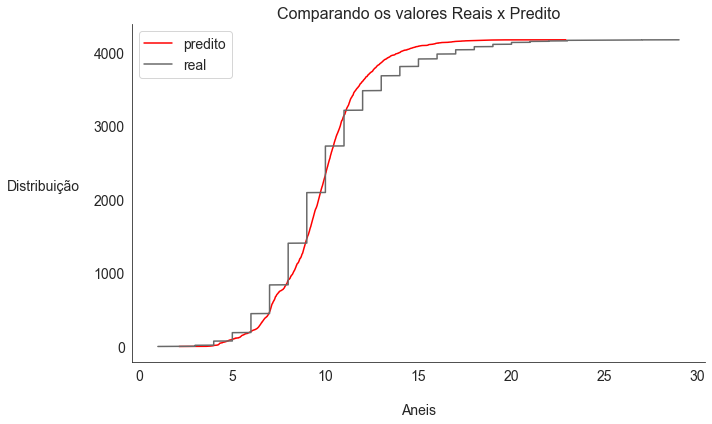

In [42]:
# vamos plotar agora nossos valores reais e os valores preditos pelo nosso modelo
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(abaSetCopy['predict'].sort_values(), abaSetCopy['predict'].index, color='red')
ax.plot(abaSetCopy['rings'].sort_values(), abaSetCopy['rings'].index, color='dimgray')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)

ax.set_title('Comparando os valores Reais x Predito', fontsize=16)
ax.set_xlabel('Aneis', fontsize=14, labelpad=20)
ax.set_ylabel('Distribuição', fontsize=14, labelpad=50, rotation=0)

ax.legend(['predito','real'], loc='best', fontsize=14)
plt.tight_layout()

Como nossos valores preditos possuem mais de uma casa decimal seu resultado no gráfico não apresentou o formato de escada que podemos perceber para os valores reais mas, é possível ver o quão próximo do valor real nosso modelo chegou.

# Conclusão
Verificar a quantidade de anéis em uma abalone de forma manual é trabalhoso. Como existe a possibilidade de identificar a quantidade dos anéis através de dados como sexo, tamanho, diâmetro e outras medidas é interessante aplicar *machine learning*  a esses casos para ver se conseguimos gerar resultados satisfatórios com esses dados. Neste artigo, mostramos o fluxo de trabalho para um projeto de  *machine learning* que envolve entender nosso conjunto de dados a fim de definirmos as melhores abordagens a serem aplicas na construção do modelo final. Em problemas de regressão sempre queremos minimizar nosso erro, ou seja, quanto mais próximo de zero melhor e para esse projeto em específico nosso modelo de GradientBoosting teve um erro de raiz quadrada média (*RMSE*) de 2.1544 batendo nosso modelo de referência que foi de 3.2385